In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [70]:
df = pd.read_csv('cleaned_imdb_top_1000.csv')
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [71]:
df['Gross'] = df['Gross'].str.replace(',','')
df = df.astype({"Gross":"int"})
df['Gross']

0       28341469
1      134966411
2      534858444
3       57300000
4        4360000
         ...    
995            0
996            0
997     30500000
998            0
999            0
Name: Gross, Length: 1000, dtype: int64

In [72]:
sns.set_theme()
sns.set_style('whitegrid')
sns.set_context('paper',font_scale=1.2)
plt.figure(figsize=(20,10))

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [73]:
df.corr(numeric_only=True)

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
Released_Year,1.000000,0.165152,-0.129737,-0.289071,0.241697,0.249133
Runtime,0.165152,1.000000,0.243096,-0.027794,0.173264,0.143928
IMDB_Rating,-0.129737,0.243096,1.000000,0.253903,0.494979,0.082381
Meta_score,-0.289071,-0.027794,0.253903,1.000000,-0.017739,-0.052221
No_of_Votes,0.241697,0.173264,0.494979,-0.017739,1.000000,0.602128
Gross,0.249133,0.143928,0.082381,-0.052221,0.602128,1.000000


## Overview according to the heatmap does not represent significant correlation between each entities.

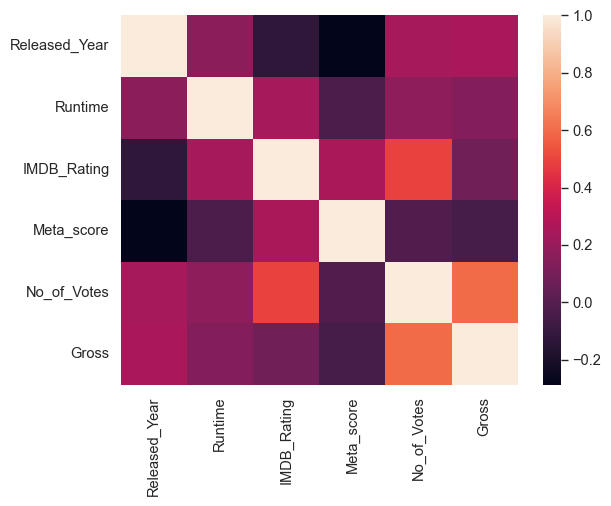

In [74]:
sns.heatmap(df.corr(numeric_only=True));
plt.savefig("headmap.jpg", bbox_inches = 'tight')

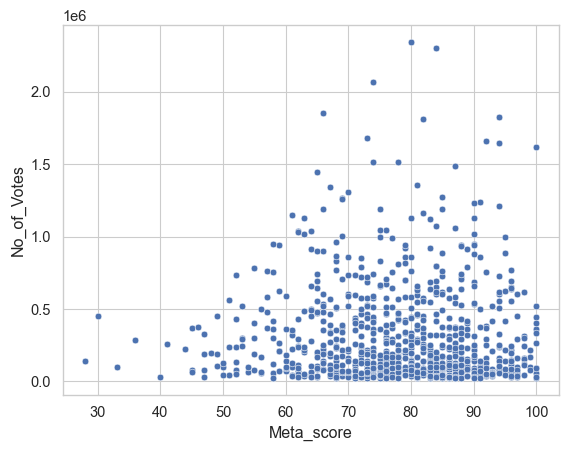

In [75]:
sns.scatterplot(data=df,x='Meta_score',y='No_of_Votes');
plt.savefig("#Votes vs Meta Score.jpg", bbox_inches = 'tight')

### Meta Score VS Runtime
- Movies with higher Meta Score tend to be between 100 - 150 minutes long.
- Average runtime and meta score are: 120 minutes, 80 meta score.

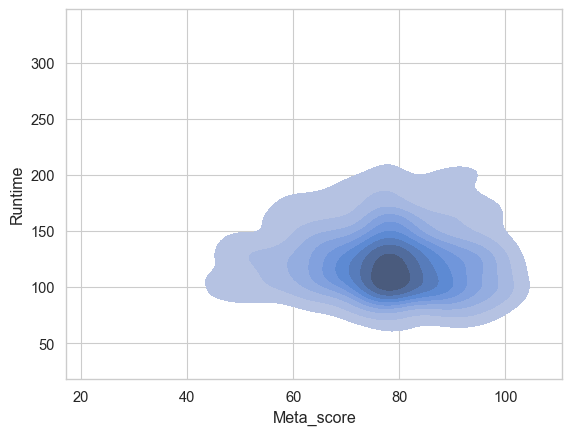

In [76]:
sns.kdeplot(data=df,x='Meta_score',y='Runtime', fill=True); 
plt.savefig("corr_Runtime_Meta_score.jpg", bbox_inches = 'tight')

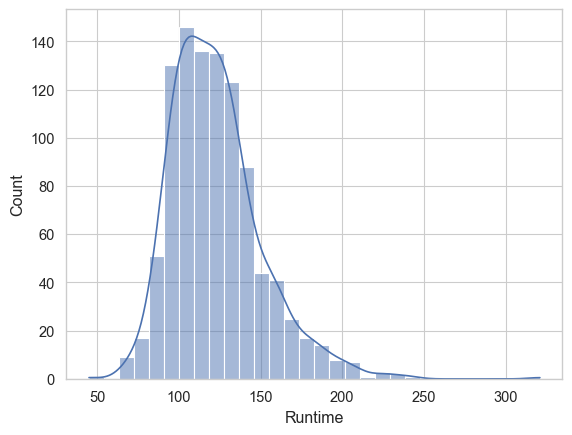

In [77]:
## This reminds me of a Gaussian graph, where the peak in the middle represents the 50% of the Movies' Runtime.
sns.histplot(df['Runtime'],kde=True,bins=30);
plt.savefig("count_Runtime.jpg", bbox_inches = 'tight')

## Number of Votes VS IMDB Rating
- Some of the number of votes are seriously outlined yet they have the highest IMDB Rating as well.
- Seeing the dark concentrated blue spot in the graph, where the Number of Votes are nearly 0 or less than 100,000. It is concluded that there are no direct relationship between these two data.

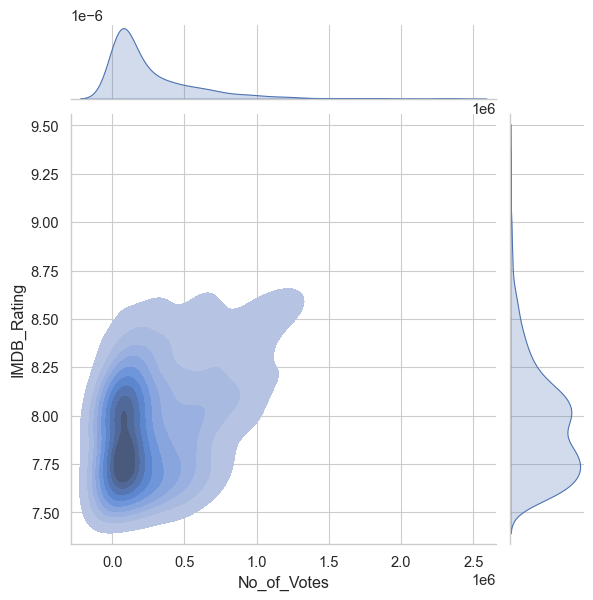

In [79]:
# mixture of scatter and histogram
sns.jointplot(data=df,x='No_of_Votes',y='IMDB_Rating',kind='kde', fill=True);
plt.savefig("votes_vs_rating.jpg", bbox_inches = 'tight')

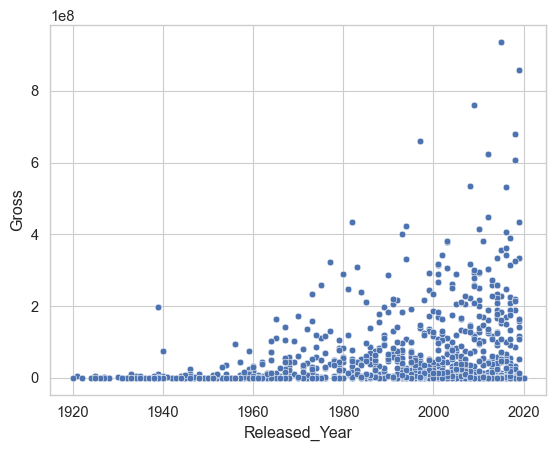

In [85]:
sns.scatterplot(data=df,x='Released_Year',y='Gross');

/tmp/ipykernel_11615/3252546248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxenplot(data=df,x='Genre',y='Gross',palette='mako');


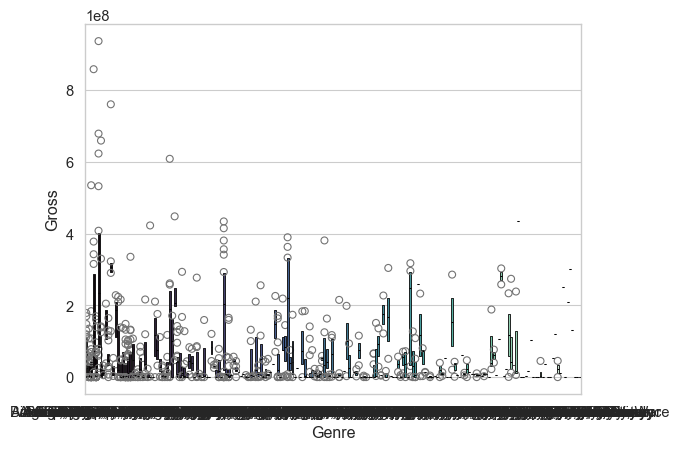

In [93]:
# This plot needs to be removed, the content is unable to visualize.
sns.boxenplot(data=df,x='Genre',y='Gross',palette='mako');